---
title: Soundscapy
subtitle: A Python Package for Soundscape Assessment and Analysis
title-slide-attributes: 
  data-background-image: images/LightLogo.png
  data-background-position: right 20% bottom 50%
  data-background-size: 25%
author:
  - name: Andrew Mitchell
    orcid: 0000-0003-0978-5046
    email: a.j.mitchell@ucl.ac.uk
    affiliation: Bartlett School of Sustainable Construction
institute: University College London
format:
  clean-revealjs: 
    code-overflow: wrap
    width: 1512
    height: 982
    highlight-style: pygments
    logo: images/internoise2024.png
  beamer: 
    aspectratio: 1610
    navigation: horizontal
    theme: metropolis
    fontsize: "8pt"
    include-in-header:
      - text: |
          \AddToHook{env/Highlighting/begin}{\tiny}    
    # monofontoptions: 
    #   - Scale=0.55
html-math-method:
  method: mathjax
  url: 'https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js'
date: '2024-08-26'
bibliography: FellowshipRefs-biblatex.bib
execute:
  echo: true
  freeze: auto
  cache: true
  keep-ipynb: true
jupyter: python3
---

In [1]:
#| echo: false
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings

warnings.simplefilter("ignore")

## Introduction

:::::: columns
:::: {.column .incremental width="60%"}
- Soundscape: A holistic approach to understanding and assessing acoustic environments
- ISO 12913 series provides a standardized framework for soundscape data collection and analysis (introduced in 2018)
- Despite standardization, challenges persist in consistent application and interpretation

::: {.fragment .incremental}
**Soundscapy** addresses these challenges through:

- An open-source Python package accessible to researchers and practitioners
- Alignment with ISO 12913-3 guidelines for consistency (including upcoming revisions)
- Facilitating reproducible and standardized analysis workflows
- Bridging the gap between theoretical soundscape concepts and practical applications
- Enabling large-scale soundscape studies with efficient data processing
:::
::::

::: {.column width="40%"}
![ISO 12913-3 recommendations for soundscape analysis](images/ISO12913-3-screenshot.png)
:::
::::::

::: notes
- Introduce the concept of soundscape as a holistic approach to acoustic environments
- Highlight the importance of the ISO 12913 series in standardizing soundscape assessment
- Emphasize the ongoing challenges in applying these standards consistently across studies
- Present Soundscapy as a comprehensive solution to these challenges
- Mention its strict alignment with ISO guidelines and focus on reproducibility and standardization
- Highlight how Soundscapy bridges the gap between theory and practice in soundscape research
:::


## Soundscapy: Origins and Purpose

::::::: columns
::::: {.column width="65%"}
- Developed as part of the Soundscape Indices (SSID) project, an ERC Horizon 2020 Grant
- Built upon the SSID Protocol, a standardized method for *in situ* soundscape data collection
- Builds upon the extensive International Soundscape Database (ISD) and other ISO 12913-2 datasets

::: fragment
Key features and innovations:

- Advanced visualization using distributional methods for nuanced soundscape representation
- Comprehensive psychoacoustic and acoustic analysis capabilities for binaural recordings
- Optimized for efficient processing of large-scale soundscape datasets
- Ensures consistency with ISO 12913-3 guidelines throughout the analysis pipeline
:::

:::::

::: {.column width="35%"}
![](images/LightLogo.png){.r-stretch}

### Simple installation and intuitive usage

``` bash
pip install soundscapy
```

In [2]:
import soundscapy as sspy

:::
:::::::

::: notes
- Explain Soundscapy's origins within the context of the SSID project, a significant research initiative
- Highlight its foundation on the SSID Protocol, emphasizing standardized data collection methods
- Discuss the integration with the International Soundscape Database (ISD) and its importance
- Emphasize key features: advanced visualization, comprehensive analysis capabilities, and scalability
- Demonstrate the simplicity of installation and basic usage with code examples
- Reinforce Soundscapy's adherence to ISO standards, ensuring consistency in soundscape research
- Highlight how Soundscapy makes advanced soundscape analysis techniques accessible to a wider audience
:::


## Soundscape Circumplex Model

::::: columns
::: {.column width="60%"}
-   Proposed by @Axelsson2010principal
-   Comprises two orthogonal dimensions that capture key aspects of soundscape perception:
    -   Pleasant-Annoying (x-axis)
    -   Eventful-Uneventful (y-axis)
-   Eight perceptual scales
-   Officially adopted in ISO/TS 12913-2, quickly becoming the dominant soundscape perception assessment method^[@Aletta2023Adoption]
-   Serves as the cornerstone for Soundscapy's analytical approach and visualisations
:::

::: {.column width="40%"}

In [3]:
#| echo: false
sample_transform = {
    "RecordID": ["EX1", "EX2"],
    "pleasant": [4, 2],
    "vibrant": [4, 3],
    "eventful": [4, 5],
    "chaotic": [2, 5],
    "annoying": [1, 5],
    "monotonous": [3, 5],
    "uneventful": [3, 3],
    "calm": [4, 1],
}
sample_transform = pd.DataFrame().from_dict(sample_transform)
sample_transform = sample_transform.set_index("RecordID")

<PolarAxes: >

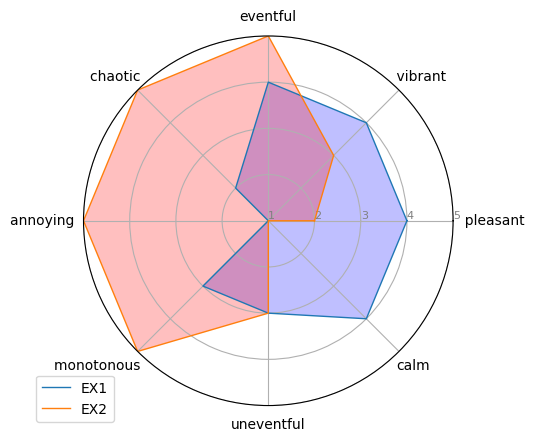

In [4]:
#| label: likert-radar
from soundscapy.plotting import likert
likert.paq_radar_plot(sample_transform)

:::
:::::

::: notes
- Provide a detailed explanation of the Soundscape Circumplex Model and its significance
- Highlight its importance in standardizing soundscape assessment methodologies
- Discuss its adoption in ISO/TS 12913-2 and its widespread use in soundscape research globally
- Explain how Soundscapy implements and extends this model in its analysis framework
- Demonstrate the radar plot visualization, explaining how it represents the eight perceptual scales
- Discuss how this model enables nuanced comparisons between different soundscapes
- Highlight how Soundscapy makes working with this model more accessible and consistent
:::

## ISO Coordinates Calculation

::: columns
:::: {.column width="48%"}
-   Transforms 8 PAQ responses into 2D coordinates
-   Implements improved equations from ISO 12913-3 upcoming revisions
-   Offers flexible input ranges (e.g., 1-5, 0-100) to accommodate various survey designs
-   Supports different angle configurations for various survey translations^[@Aletta2024Soundscape]

$$
P_{ISO} = \frac{1}{\lambda_{Pl}} \sum_{i=1}^{8} \cos{\theta_i} \cdot \sigma_i
$$ {#eq-isopl}

$$
E_{ISO} = \frac{1}{\lambda_{Pl}} \sum_{i=1}^{8} \sin{\theta_i} \cdot \sigma_i
$$ {#eq-isoev}

::::

:::: {.column width="48%"}
::::: {.r-stack}
:::::: {.fragment .fade-out}

In [5]:
# Load data from the ISD
data = sspy.isd.load()

# Apply built-in data quality checks
data, excl_data = sspy.isd.validate(data, allow_paq_na=False)

# Calculate the ISO Coordinates
data = sspy.surveys.add_iso_coords(data)

In [6]:
#| echo: false
view_data = sspy.surveys.return_paqs(data, incl_ids = False, other_cols = ['ISOPleasant', 'ISOEventful'])
view_data.head(5)

,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
0,2.0,4.0,2.0,1.0,2.0,2.0,4.0,2.0,0.219670,-0.133883
1,2.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,-0.426777,0.530330
2,5.0,3.0,3.0,1.0,2.0,1.0,3.0,4.0,0.676777,-0.073223
3,5.0,3.0,3.0,1.0,2.0,2.0,3.0,4.0,0.603553,-0.146447
4,5.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,0.457107,-0.146447


::::::

:::::: {.fragment}

<PolarAxes: >

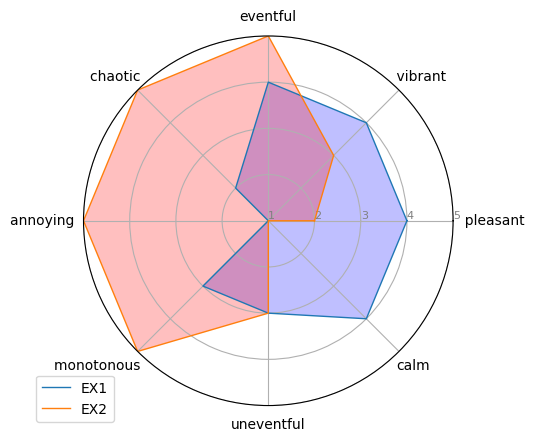

In [7]:
#| echo: false
likert.paq_radar_plot(sample_transform)

::::::

:::::: {.fragment}

<Axes: title={'center': 'Soundscape Scatter Plot'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

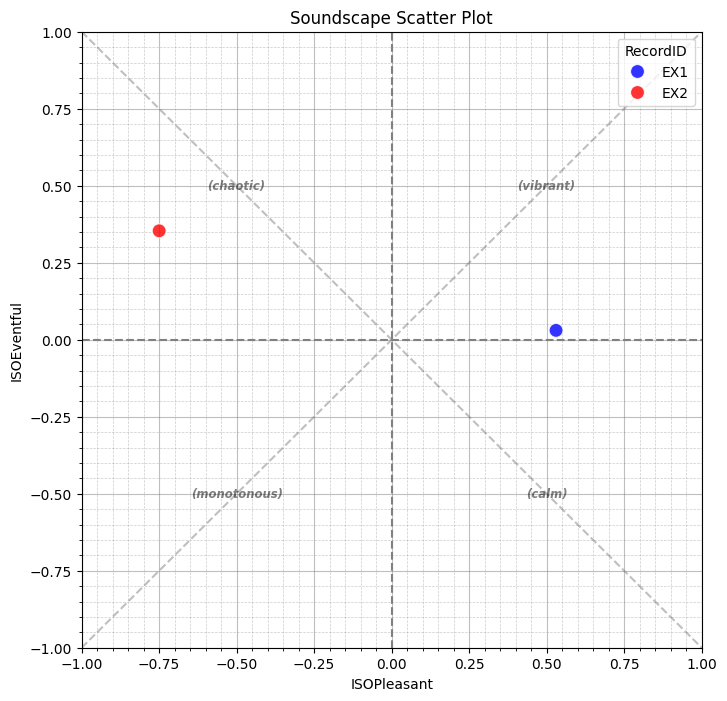

In [8]:
#| code-fold: true
import seaborn as sns
sample_transform = sspy.surveys.rename_paqs(sample_transform)
sample_transform = sspy.surveys.add_iso_coords(sample_transform, overwrite=True)
colors = ["b", "r"]
palette = sns.color_palette(colors)
sspy.plotting.scatter_plot(sample_transform, hue="RecordID", palette=palette, diagonal_lines=True, legend="brief", s=100, figsize=(8,8))

::::::
:::::

::::
:::

::: notes
 - Explain the purpose and functionality of ISO coordinate calculation in detail
 - Highlight the strict alignment with ISO 12913-3 equations, ensuring standardized analysis
 - Emphasize the flexibility in handling different input ranges and angle configurations
 - Demonstrate the process with a step-by-step code example
 - Discuss the importance of this function in Soundscapy's analysis pipeline
 - Explain how this standardized approach enables consistent comparisons across studies

:::

## Distribution-based Analysis

::::::::: columns
::: {.column width="50%"}
-   Developed by @Mitchell2022How
-   Represents the collective perception of a soundscape as a distribution, using kernel density estimation

 - Key Benefits:
   - Visualizes central tendency, dispersion, and skewness of perceptions
   - Illustrates the shape and extent of soundscape perception in circumplex space
   - Allows for statistical comparisons between different soundscapes or groups
 - Additional features:
   - Calculation of percentiles and other statistical measures
   - Multiple visualization options (both Seaborn and Plotly backends available)
:::

::::::: {.column width="50%"}
:::::: r-stack
::: {.fragment .fade-out}

<Axes: title={'center': 'Camden Town Soundscape Distribution'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

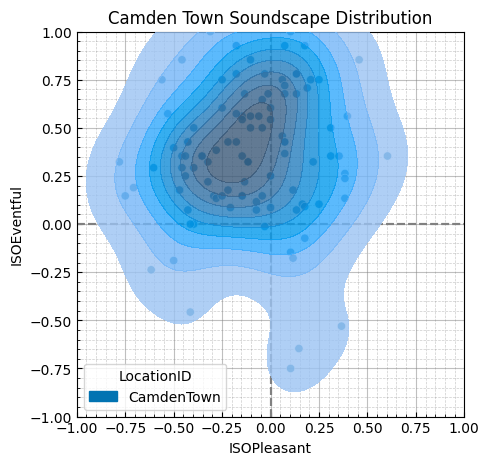

In [9]:
sspy.plotting.density_plot(
  sspy.isd.select_location_ids(data, "CamdenTown"),
  title="Camden Town Soundscape Distribution",
  hue="LocationID",
  incl_scatter=True
)

:::

::: {.fragment .fade-in-then-out}

<Axes: title={'center': 'Comparison between two soundscapes'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

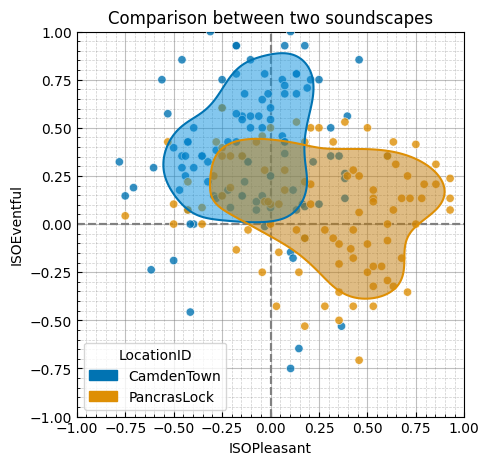

In [10]:
#| code-line-numbers: '2,7'
sspy.plotting.density_plot(
  sspy.isd.select_location_ids(data, ("CamdenTown", "PancrasLock")),
  title = "Comparison between two soundscapes",
  hue = "LocationID",
  incl_scatter=True,
  incl_outline=True,
  simple_density=True,
)

:::

::: fragment

In [11]:
#| code-line-numbers: "|1,6"
from soundscapy.plotting import Backend
import plotly.io as pio

sspy.plotting.scatter_plot(
  sspy.isd.select_location_ids(data, ("RegentsParkJapan")),
  backend = Backend.PLOTLY,
  title = "Regents Park Japanese Garden Soundscape",
)

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/soundscapy/plotting/backends.py:246: UserWarning: PlotlyBackend is very experimental and not fully implemented.
  warnings.warn(


:::
::::::
:::::::
:::::::::

::: notes
This distribution-based visualisation and analysis clearly shows three important characteristics of the soundscape perception of a group or location: 1. The distribution across both pleasantness and eventfulness, including the central tendency, the dispersion, and any skewness in the response. 2. The general shape of the soundscape within the circumplex space - in this case, Pancras Lock is mostly in the pleasant half, with a slight skew towards eventfulness. Proceedings of INTER-NOISE 2024 3. The degree of agreement about the soundscape perception among the sample. In addition to these visualisations, Soundscapy provides functions for calculating some basic statistics about the distribution of responses, such as the mean, median, and standard deviation, as well as metrics inspired by reporting from noise annoyance studies, such as the percentage of respondents who rated the soundscape as ‘pleasant’ or ‘eventful’.
:::

## Databases Integration

::::: columns
::: {.column width="50%"}
-   International Soundscape Database (ISD)^[@Mitchell2021International]
    -   2,706 high-quality, real-world binaural recordings
    -   3,589 *in situ* survey responses
    -   Data from 6 cities across Europe and China
-   Soundscape Attributes Translation Project (SATP)^[@Oberman2024Soundscape]
    -   19,089 responses
    -   708 participants
    -   19 languages
-   ARAUS (Affective Responsees to Augmented Urban Soundscapes)^[@Ooi2023ARAUS]
    -   Currently under development
    -   Large-scale lab-based dataset of augmented soundscapes
:::

::: {.column width="50%"}

In [12]:
#| label: database-load
# Load ISD data
isd_data = sspy.isd.load()

# Load SATP data
import soundscapy.databases.satp as satp
satp_data = satp.load_zenodo()

print(f"ISD shape: {isd_data.shape}")
print(f"SATP shape: {satp_data.shape}")

sspy.isd.soundscapy_describe(isd_data).head(5)

ISD shape: (3589, 142)
SATP shape: (17441, 16)


,count,ISOPleasant,ISOEventful,pleasant,eventful,vibrant,chaotic,monotonous,calm
CarloV,126,0.518,-0.012,0.865,0.413,0.365,0.048,0.008,0.484
SanMarco,99,0.221,0.373,0.707,0.848,0.616,0.222,0.020,0.091
PlazaBibRambla,24,0.463,-0.023,0.667,0.417,0.375,0.042,0.042,0.292
CamdenTown,105,-0.103,0.364,0.352,0.895,0.295,0.600,0.038,0.057
EustonTap,100,-0.211,0.190,0.240,0.780,0.170,0.610,0.140,0.060


:::
:::::

::: notes
Key benefits:

- Instant access to large, diverse, and high-quality datasets
- Facilitates robust cross-cultural and multi-lingual studies
- Enables large-scale analysis and meta-studies
- Promotes standardization and comparability in soundscape research

- Explain the significance of integrated databases in Soundscapy and their impact on research capabilities
- Highlight the ease of loading and working with these extensive datasets
- Discuss the potential for cross-cultural and multi-lingual soundscape studies using these resources
- Demonstrate basic data loading, exploration, and description with code examples
- Mention the upcoming integration of ARAUS and its implications for augmented reality soundscape research
- Emphasize how these databases enable more comprehensive and generalizable soundscape studies
:::

## Psychoacoustic Analysis {.smaller}

::::: columns
::: {.column width="50%"}
**Integration with multiple libraries:**

-   Python Acoustics: For standard acoustic metrics
-   scikit-maad: Advanced ecological soundscape analysis
-   MoSQITo: Psychoacoustics metrics

**Wide range of metrics:**

-   SPL ($L_{Zeq}$, $L_{Aeq}$, $L_{Ceq}$)
-   Loudness (N)
-   Sharpness (S)
-   Roughness (R)
-   Bioacoustic Indices
-   Many more...

**Key advantages:**

-   Completely free, open license, and open source
-   Adherence to ISO and other relevant standards
-   Optimized for binaural recordings
-   Consistent calculation methods across studies
-   Extensible framework for adding new metrics
:::

:::: {.column width="50%"}

::: {.fragment style="font-size: 120%" .semi-fade-out}

In [13]:
#| label: binaural-analysis
from soundscapy.audio.analysis_settings import MetricSettings
from soundscapy.audio import Binaural

b = Binaural.from_wav("data/CT101.wav")

laeq_settings = MetricSettings(
    run = True,
    statistics = (5, 50, 'avg', 'max'),
    label="LAeq",
)

b.pyacoustics_metric('LAeq', metric_settings=laeq_settings).round(2)

LAeq  LAeq_5  LAeq_50  LAeq_max
Recording Channel                                  
CT101     Left     68.89   72.27    68.12     77.39
          Right    69.96   73.63    68.50     78.71

:::

::: {.fragment style="font-size: 120%"}
\

In [14]:
b.mosqito_metric('sharpness_din_perseg').round(2)

S_5  S_10  S_50  S_90  S_95  S_avg  S_max  S_min  S_kurt  \
Recording Channel                                                              
CT101     Left     1.34  1.32  1.23  1.16  1.13   1.23   1.90   1.00   16.01   
          Right    1.41  1.36  1.25  1.16  1.14   1.26   1.72   1.06    4.53   

                   S_skew  
Recording Channel          
CT101     Left       2.09  
          Right      1.48

:::

::::

:::::

::: notes
Highlight the comprehensive psychoacoustic analysis capabilities. Mention the integration with established libraries. Emphasize the simplicity of performing complex analyses. Discuss the importance of these metrics in soundscape assessment.
:::

## Batch Processing and Performance {.scrollable}

::::: columns
::: {.column width="50%"}
- **Unified Output Format**: Ensures consistency across datasets, simplifying analysis.

- **Parallel Processing**: Leverages multi-core CPUs for efficient computation.

- **Reproducbible Analysis**: Shareable plain-text analysis configuration and documentation.

**Performance Example**:

- 20 recordings (10 min 41 sec total)
- Serial processing: 29.4 minutes
- Parallel processing: 7.7 minutes
- Speed-up factor: 3.8x
:::

::: {.column width="50%"}

In [15]:
#| echo: false
__spec__ = None # Who fucking knows why: https://stackoverflow.com/questions/45720153/python-multiprocessing-error-attributeerror-module-main-has-no-attribute

In [16]:
#| eval: true
#| label: audio-analysis
#| code-line-numbers: "|1|5,6|8-12|14,15"
from soundscapy.audio import AudioAnalysis

wav_folder = Path("data")

# Initialize AudioAnalysis with default settings
analysis = AudioAnalysis()

# Analyse a folder of recordings
folder_results = analysis.analyze_folder(
    wav_folder, 
    calibration_file="data/Levels.json"
)

# Print results
folder_results.head()

Analyzing files:   0%|          | 0/20 [00:00<?, ?it/s]

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/_signal.py:175: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  self *= factor
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/_signal.py:175: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  self *= factor
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/_signal.py:175: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  self

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.

[Warning] Signal resampled to 48 kHz to allow ca

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:52: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/standards/iso_tr_25417_2007.py:125: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 10.0 * np.log10(sound_exposure(pressure, fs, axis=axis) / reference_sound_exposure)
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/standards/iso

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow ca

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.



/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow ca

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

LAeq     LAeq_5    LAeq_10    LAeq_50    LAeq_90  \
Recording Channel                                                          
CT108     Left     70.589507  74.558756  73.843937  69.525786  64.824693   
          Right    70.112106  73.867805  73.206158  69.500252  63.767889   
CT107     Left     68.044340  72.248420  71.395037  66.199040  62.448782   
          Right    66.957640  71.154329  69.520778  65.567530  62.737097   
CT101     Left     68.875703  72.257301  71.154342  68.113339  63.375091   

                     LAeq_95   LAeq_min   LAeq_max  LAeq_kurt  LAeq_skew  ...  \
Recording Channel                                                         ...   
CT108     Left     64.187174  62.768378  75.729902  -0.672714  -0.097663  ...   
          Right    63.381380  62.296449  76.077951  -1.033197  -0.220893  ...   
CT107     Left     61.533067  60.039913  76.177939  -0.535311   0.386803  ...   
          Right    62.105325  59.427035  73.699931  -0.229152   0.490734  ...   
CT101     Left     62.366533  60.560166  77.382651   0.272011  -0.013877  ...   

                       TFSD  H_Havrda   H_Renyi  H_pairedShannon      H_gamma  \
Recording Channel                                                               
CT108     Left     0.601720  0.315433  1.462151         3.302710  1379.622896   
          Right    0.597461  0.312580  1.388225         3.167239  1171.735670   
CT107     Left     0.596434  0.306238  1.254894         3.044223  1338.067296   
          Right    0.600826  0.301908  1.180762         2.863631   875.440353   
CT101     Left     0.596465  0.306220  1.254552         2.981413  1004.342366   

                   H_GiniSimpson      RAOQ       AGI  ROItotal  ROIcover  
Recording Channel                                                         
CT108     Left          0.816123  0.017529  1.460654        22  0.849617  
          Right         0.799022  0.013242  1.623013         5  1.254925  
CT107     Left          0.770212  0.014416  1.821029        31  3.092858  
          Right         0.747898  0.008257  1.578739        45  2.396588  
CT101     Left          0.767638  0.012133  1.502836        38  1.794776  

[5 rows x 131 columns]

:::
:::::

::: notes
Explain batch processing benefits:
1. Unified output for consistency and simplified analysis.
2. Parallel processing for faster computations.
3. Optimization for large datasets enabling comprehensive studies.
4. Use performance example to illustrate real-world benefits.
5. Emphasize how these features enable new types of large-scale research.
:::

## Customization and Flexibility

::::: columns
::: {.column width="50%"}
- **Reproducible Analysis**: YAML-based configs ensure consistent, replicable results.

- **Version Control Friendly**: Easily track, share, and collaborate on configurations.

- **Data Science Integration**:
  - Works with pandas for data manipulation
  - Compatible with matplotlib/seaborn and plotlly for visualizations
  - Leverages popular Python libraries

- **Extensible Architecture**: 
  - Allows addition of new metrics and methods
  - Adaptable to diverse research requirements
  - Potential for community-driven improvements
:::

::: {.column width="50%"}

:::: {.r-stack}

::::: {.fragment .fade-out}

In [16]:
import time
from soundscapy import AudioAnalysis
from soundscapy.logging import set_log_level
from loguru import logger
from tqdm.auto import tqdm

set_log_level("info")

wav_folder = Path("data")
analysis = AudioAnalysis()


start = time.perf_counter()
i = 0
for wav in tqdm(wav_folder.glob("*.wav")):
    file_start = time.perf_counter()
    analysis.analyze_file(wav)
    i += 1
    logger.info(f"Processed file num {i} in {time.perf_counter() - file_start}")

print(f"{(time.perf_counter() - start) / 60:.2f} min")

2024-08-25 23:56:26.948 | INFO     | soundscapy.logging:set_log_level:51 - Log level set to INFO
2024-08-25 23:56:26.949 | INFO     | soundscapy.audio.analysis_settings:load_config:303 - Loading default configuration
2024-08-25 23:56:26.950 | INFO     | soundscapy.audio.analysis_settings:default:156 - Loading default configuration from /Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/soundscapy/data/default_settings.yaml
2024-08-25 23:56:26.950 | INFO     | soundscapy.audio.analysis_settings:from_yaml:137 - Loading configuration from /Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/soundscapy/data/default_settings.yaml
2024-08-25 23:56:26.958 | INFO     | soundscapy.audio.audio_analysis:__init__:18 - Psychoacoustic analysis initialized with configuration: None


0it [00:00, ?it/s]

2024-08-25 23:56:26.999 | INFO     | soundscapy.audio.audio_analysis:analyze_file:44 - Analyzing file: data/CT108.wav
2024-08-25 23:56:26.999 | INFO     | soundscapy.audio.parallel_processing:load_analyse_binaural:75 - Processing data/CT108.wav
2024-08-25 23:56:27.000 | INFO     | soundscapy.audio.binaural:from_wav:227 - Loading WAV file: data/CT108.wav
2024-08-25 23:56:27.003 | WARNING  | soundscapy.audio.parallel_processing:load_analyse_binaural:88 - No calibration levels found for data/CT108.wav
2024-08-25 23:56:27.003 | INFO     | soundscapy.audio.metrics:process_all_metrics:978 - Processing all metrics for CT108
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/standards/iso_tr_25417_2007.py:110: DeprecationWarning:

__array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)

/Users/mitch/Library/CloudStorage

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.



2024-08-26 00:00:07.028 | INFO     | soundscapy.audio.binaural:mosqito_metric:473 - Running mosqito metric: sharpness_din_perseg


[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


2024-08-26 00:00:09.702 | INFO     | soundscapy.audio.binaural:mosqito_metric:473 - Running mosqito metric: roughness_dw
2024-08-26 00:02:22.155 | INFO     | soundscapy.audio.binaural:maad_metric:554 - Running maad metric: all_temporal_alpha_indices
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning:

__array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning:

__array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - 

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


2024-08-26 00:03:32.582 | INFO     | soundscapy.audio.binaural:mosqito_metric:473 - Running mosqito metric: sharpness_din_perseg


[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


2024-08-26 00:03:35.105 | INFO     | soundscapy.audio.binaural:mosqito_metric:473 - Running mosqito metric: roughness_dw


In [ ]:
# Customize analysis settings
new_config = {
  "MoSQITo": {
    "loudness_zwtv": {
      "statistics": ("avg", 5, 50),
      "func_args": {"field_type": "diffuse"}
    }
  }
}

analysis.update_config(new_config)
analysis.save_config("updated_config.yaml")

:::::

::::: {.fragment}

![](images/Soundscapy-config.png)

:::::

:::: 

:::
:::::

::: notes
Explain flexibility and customization features:
1. YAML configs for reproducibility in research.
2. Version control benefits for collaborative projects.
3. Advantages of supporting various data formats.
4. Integration with data science tools and implications for workflows.
5. Extensible architecture allowing adaptation to different research needs.
6. How these features make Soundscapy versatile for various soundscape studies.
:::

## Package Documentation 

::::: columns
::: {.column width="40%"}
- **Comprehensive Documentation**:
  - Installation guide
  - Quickstart tutorials
  - API reference
  - Example notebooks

- **GitHub Repository**:
  - Open-source code
  - Issue tracking
  - Contribution guidelines

- **Regular Updates**:
  - Version changelog
  - Deprecation notices
  - New feature announcements
:::

::::: {.column width="60%"}
:::: {.r-stack}
::: {.fragment}
![Soundscapy Documentation Homepage](images/soundscapy-homepage.png)
:::

:::{.fragment}
![ - ](images/binaural-tutorial.png)

:::

::::
:::::

:::::

::: notes
Highlight the comprehensive nature of the documentation.
Mention the open-source aspect and community involvement possibilities.
Emphasize the commitment to keeping the package and its documentation up-to-date.
:::

## Future Work: Predictive Models^[@Hou2024Soundscape]

![Modular Framework](images/Soundscapy2.png){height="550"}

:::{.fragment}
::::: {.columns .auto-stretch}
::: {.column width="48%"}
- **Pretrained Models Integration**:
  - Predict soundscape perception from acoustic features
  - Multiple model support for comparison

:::

::: {.column width="48%"}

- **Design Optimization**:
  - Predict impact of soundscape interventions
  - Assist in urban planning decisions
:::
:::::
:::

::: notes
Explain the potential of integrating pretrained models for soundscape prediction.
Discuss the implications for automated assessment and design optimization.
Highlight how this could change the landscape of soundscape research and urban planning.
:::

## Future Work: Soundscape Perception Indices (SPI)^[@Mitchell2024Soundscape]

:::: columns

::: {.column width=48%}

- **Single Index Calculation**:
  - Simplify complex soundscape data
  - Enable quick comparisons between locations

- **Standardized Reporting**:
  - Facilitate communication with stakeholders
  - Support policy-making processes
:::

::: {.column width=48%}

- **Customizable Weighting**:
  - Adapt to different cultural contexts
  - Account for varying research priorities

- **Applications**:
  - Urban planning and design optimization
  - Environmental quality assessment
  - Cross-cultural soundscape studies
:::
::::

![SPI Calculation Framework](images/SPI-framework.drawio.png)

::: notes
Introduce the concept of Soundscape Perception Indices (SPI).
Explain how it simplifies complex data for easier interpretation and comparison.
Discuss the potential applications in urban planning, policy-making, and cross-cultural studies.
:::

## Conclusion

::::: {.columns}
:::: {.column width="65%"}

- **Standardized Analysis**: Consistent with ISO 12913-3 guidelines

- **User-Friendly**: Easy-to-use Python package for researchers and practitioners

- **Powerful Tools**: 
  - Distribution-based visualization
  - Comprehensive psychoacoustic analysis
  - Efficient batch processing

- **Future-Ready**: 
  - Ongoing development for predictive models
  - SPI for simplified soundscape assessment

- **Get Involved**:
  - GitHub: [github.com/MitchellAcoustics/Soundscapy](https://github.com/MitchellAcoustics/Soundscapy)
  - Docs: [soundscapy.readthedocs.io](https://soundscapy.readthedocs.io)
  - PyPI: `pip install soundscapy`

::::

:::: {.column width="35%" .center}

[![](images/qr.png)](https://soundscapy.readthedocs.io/en/latest/){.center}

::::

:::::

::: notes
Summarize the key benefits and features of Soundscapy.
Emphasize its alignment with ISO standards and its user-friendly nature.
Highlight the ongoing development and future directions.
Encourage audience engagement and contributions.
Provide clear information on how to access and start using Soundscapy.
:::

## References

::: {.columns}

:::: {.column width=65%} 
::: {#refs}
:::
::::

:::: {.column width=35%}

Also check out my other package for even more advanced circumplex analysis, currently under development!

[![](images/qr-2.png)](ttps://circumplex.readthedocs.io/en/latest/)

This presentation is available online at [https://mitchellacoustics.quarto.pub/internoise-2024-soundscapy-pres](https://mitchellacoustics.quarto.pub/internoise-2024-soundscapy-pres/#/title-slide)

::::

:::